In [1]:
using SparseArrays, LinearAlgebra, Plots, Random

In [2]:
n=100
N = n*n
max_iter = 3000
ep = 10^(-6)

1.0e-6

In [3]:
rows = vcat(collect(1:n),collect(1:n-1),collect(2:n))
cols = vcat(collect(1:n),collect(2:n),collect(1:n-1))
vals = vcat(2*ones(n),-ones(n-1),-ones(n-1))
K=sparse(rows,cols,vals,n,n)
ID = sparse(I,n,n)
A = kron(K,ID) + kron(ID,K)

10000×10000 SparseMatrixCSC{Float64, Int64} with 49600 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦

In [5]:
function Steepest_descend(A,x_star,x::SparseMatrixCSC)
    error = [sqrt(((x-x_star)'*A*(x-x_star))[1]) ]
    b = A*x_star
    r = b-A*x
    
    for i in 1:max_iter
        
        r = b-A*x
        energy = (r'*A*r)[1]
        
        #println(energy)
        if sqrt(energy) < ep
            return x,error
        end
     
        alpha = (r'*r)[1]/energy
        x+=alpha*r
        err = x - x_star
        push!(error,sqrt((err'*A*err)[1]))

        if (i%100)==0
            println("iteration ",i," error= ",error[i])
        end
    end
    return x,error
end



Steepest_descend (generic function with 1 method)

In [6]:
x_star = sprand(N,1,1.0)
x_0 = spzeros(N,1)
nothing;

In [9]:
r=A*x_star - x_0
r'*A*r

1×1 SparseMatrixCSC{Float64, Int64} with 1 stored entry:
 92741.97662313898

In [7]:

x,error = Steepest_descend(A,x_star,x_0)
nothing;

iteration 100 error= 2.615671765103905
iteration 200 error= 2.1122198683337228
iteration 300 error= 1.8450546276919362
iteration 400 error= 1.665496921322676
iteration 500 error= 1.5310711521139502
iteration 600 error= 1.4236997993395615
iteration 700 error= 1.333996975272633
iteration 800 error= 1.2564820024740309
iteration 900 error= 1.1877317645871805
iteration 1000 error= 1.1255275615834104
iteration 1100 error= 1.0683991308874927
iteration 1200 error= 1.0153553452639028
iteration 1300 error= 0.9657161136937147
iteration 1400 error= 0.9190046893152343
iteration 1500 error= 0.8748779341029883
iteration 1600 error= 0.8330809865891139
iteration 1700 error= 0.7934177544755565
iteration 1800 error= 0.7557316940602608
iteration 1900 error= 0.7198932769559073
iteration 2000 error= 0.6857918015887402
iteration 2100 error= 0.6533300260036989
iteration 2200 error= 0.6224206322742041
iteration 2300 error= 0.5929838802337364
iteration 2400 error= 0.5649460340339383
iteration 2500 error= 0.5382

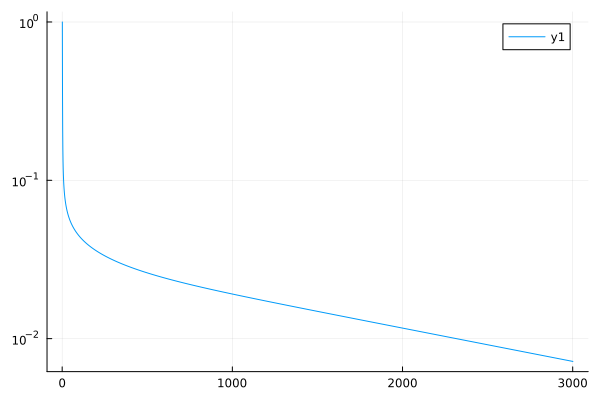

In [10]:
plot(error/error[1],yaxis=:log)

In [11]:
function conjugate_gradient(A,b,x::SparseMatrixCSC)
    b = A*x_star
    error = [sqrt(((x-x_star)'*A*(x-x_star))[1])]
    
    res = b - A*x
    p = res

    norm_square = (res'*res)[1]
    for i in 1:max_iter
        A_p = A*p
        alpha = norm_square / (res'*A_p)[1]

        x+=alpha * p

        res -= alpha*A_p

        old_norm = norm_square
        norm_square = (res'*res)[1]

        beta = norm_square / old_norm

        p = res + beta*p

        err = x - x_star
        push!(error,sqrt((err'*A*err)[1]))
        if sqrt(norm_square) < ep
            return x,error
        end
        if (i%100)==0
            println("iteration ",i," error= ",error[i])
        end
    end

    return x,error
end



conjugate_gradient (generic function with 1 method)

iteration 100 error= 0.10313732895304856
iteration 200 error= 0.00022526898135135075


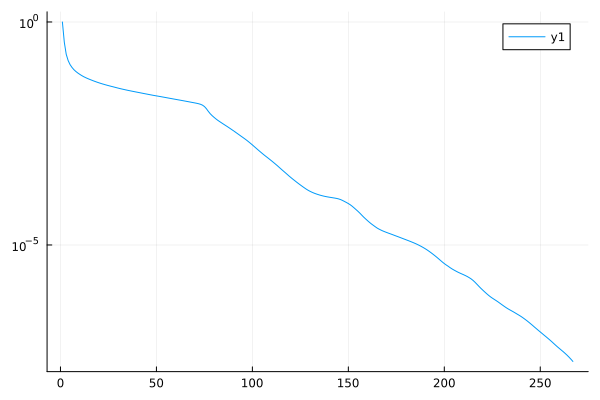

In [12]:
x_CG,error_CG = conjugate_gradient(A,x_star,x_0)
plot(error_CG/error_CG[1], yaxis=:log)

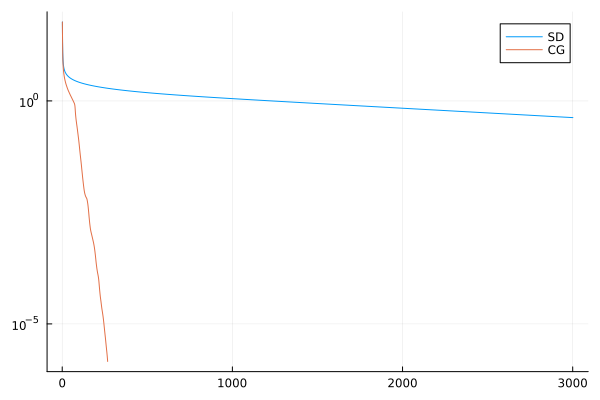

In [13]:
plot([error,error_CG], yaxis=:log, label=["SD" "CG"])

as we can see since the relavtive error of the steepest descent method are always bounded via the quotient \frac{(\kappa)-1}{(\kappa)+1}^k which decay very slowly (\kappa = (n+1)^2)

meanwhile the relative error of CG method are bounded by the whole spectrum of A which converge faster than longer you go down and the theoretical bound is only square root of \kappa

In [7]:
println(length(error_CG))

3001


In [1]:
5%3

2